# Customer Shopping Behavior Analysis

In this notebook, I perform an extensive Exploratory Data Analysis (EDA) on the Customer Shopping Behavior dataset. The goal is to uncover patterns in customer demographics, purchasing habits, and payment preferences.

## 1. Data Loading and Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting visualization style for a professional look
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Loading the dataset
try:
    df = pd.read_csv('customer_shopping_behavior.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: File not found. Please check the file path.")

Dataset loaded successfully.


In [2]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3863 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
# Statistical summary of numerical columns
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3863.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.750065,25.351538
std,1125.977353,15.207589,23.685392,0.716983,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.800000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## 2. Data Cleaning and Preprocessing
Ensuring data quality by handling missing values and standardizing column names for SQL compatibility.

In [5]:
# Checking for missing values
df.isnull().sum()

Customer ID                0
Age                        0
Gender                     0
Item Purchased             0
Category                   0
Purchase Amount (USD)      0
Location                   0
Size                       0
Color                      0
Season                     0
Review Rating             37
Subscription Status        0
Shipping Type              0
Discount Applied           0
Promo Code Used            0
Previous Purchases         0
Payment Method             0
Frequency of Purchases     0
dtype: int64

In [6]:
# Handling missing 'Review Rating' by imputing with the median of the specific Category
# This preserves the integrity of the data better than a global mean.
df['Review Rating'] = df.groupby('Category')['Review Rating'].transform(lambda x: x.fillna(x.median()))

In [7]:
# Standardizing column names to snake_case
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df.rename(columns={'purchase_amount_(usd)': 'purchase_amount'})

print("Standardized Columns:", df.columns.tolist())

Standardized Columns: ['customer_id', 'age', 'gender', 'item_purchased', 'category', 'purchase_amount', 'location', 'size', 'color', 'season', 'review_rating', 'subscription_status', 'shipping_type', 'discount_applied', 'promo_code_used', 'previous_purchases', 'payment_method', 'frequency_of_purchases']


## 3. Feature Engineering
Deriving new insights by categorizing age and converting frequency to numeric values.

In [8]:
# Creating Age Groups
labels = ['Young Adult', 'Adult', 'Middle-aged', 'Senior']
df['age_group'] = pd.qcut(df['age'], q=4, labels=labels)
df[['age', 'age_group']].head()

,age,age_group
0,55,Middle-aged
1,19,Young Adult
2,50,Middle-aged
3,21,Young Adult
4,45,Middle-aged


In [9]:
# Converting Purchase Frequency to numeric days for analysis
frequency_mapping = {
    'Fortnightly': 14,
    'Weekly': 7,
    'Monthly': 30,
    'Quarterly': 90,
    'Bi-Weekly': 14,
    'Annually': 365,
    'Every 3 Months': 90
}

df['purchase_frequency_days'] = df['frequency_of_purchases'].map(frequency_mapping)

In [10]:
# Removing redundant columns
if (df['discount_applied'] == df['promo_code_used']).all():
    df = df.drop('promo_code_used', axis=1)
    print("Dropped redundant 'promo_code_used' column.")

Dropped redundant 'promo_code_used' column.


## 4. Exploratory Data Analysis (EDA)
Visualizing the data to uncover underlying patterns.

### 4.1 Demographic Analysis

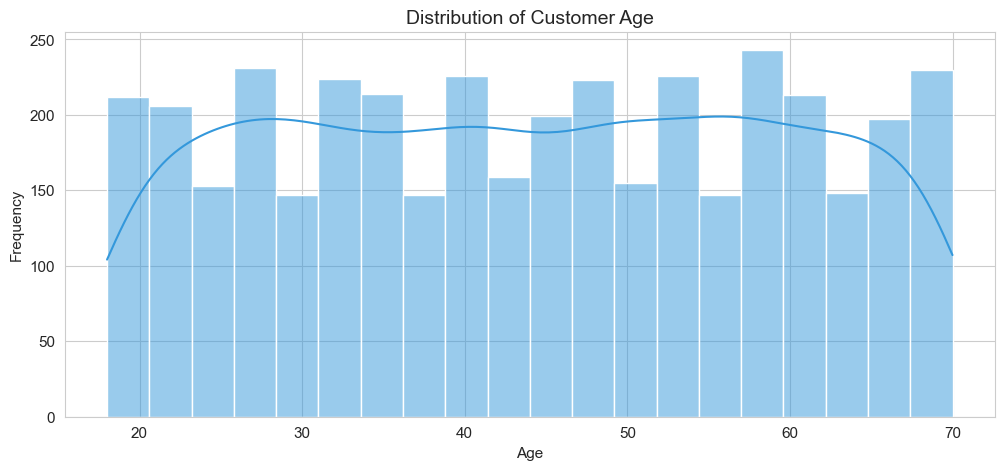

In [11]:
plt.figure(figsize=(12, 5))
sns.histplot(df['age'], bins=20, kde=True, color='#3498db')
plt.title('Distribution of Customer Age', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Observation:** The age distribution appears to be relatively uniform, indicating a diverse customer base ranging across all age groups without significant bias towards a specific generation.

C:\Users\vishe\AppData\Local\Temp\ipykernel_23732\1271688871.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gender', palette='pastel')


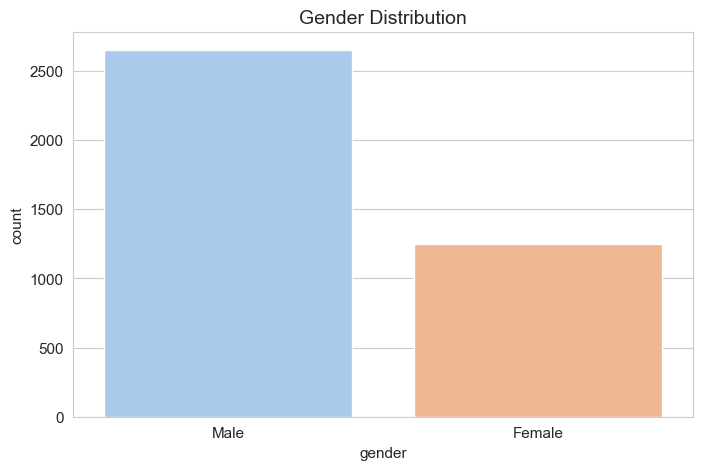

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender', palette='pastel')
plt.title('Gender Distribution', fontsize=14)
plt.show()

### 4.2 Category and Spending Analysis

C:\Users\vishe\AppData\Local\Temp\ipykernel_23732\313130894.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category', order=order, palette='viridis')


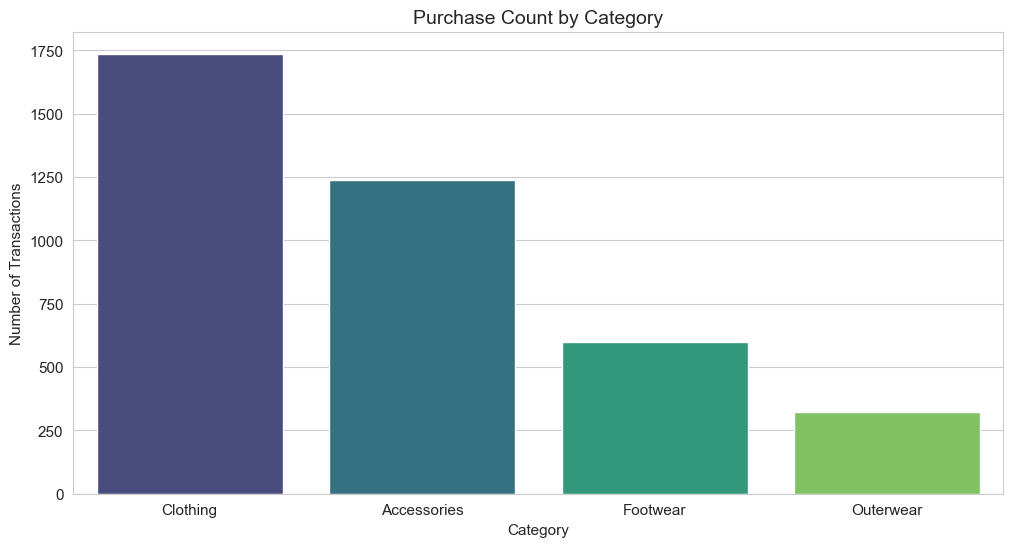

In [13]:
plt.figure(figsize=(12, 6))
order = df['category'].value_counts().index
sns.countplot(data=df, x='category', order=order, palette='viridis')
plt.title('Purchase Count by Category', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.show()

C:\Users\vishe\AppData\Local\Temp\ipykernel_23732\3006533870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='season', y='purchase_amount', palette='coolwarm')


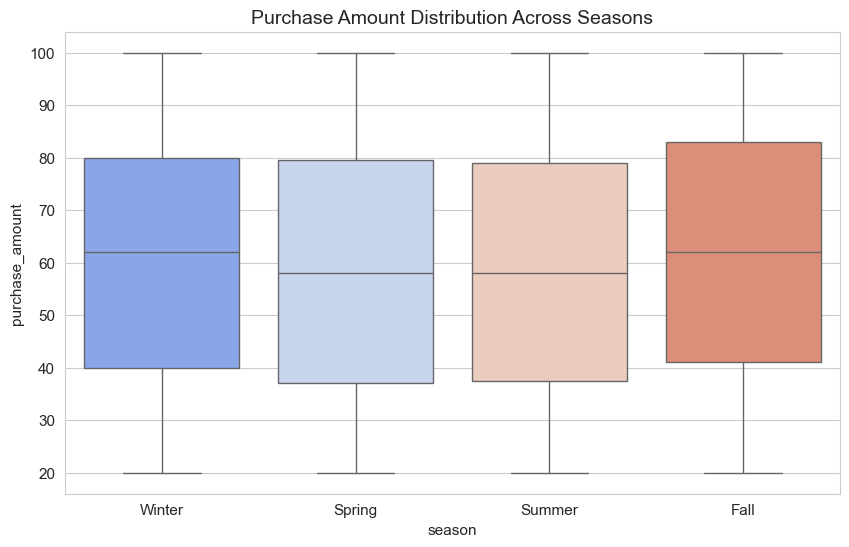

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='season', y='purchase_amount', palette='coolwarm')
plt.title('Purchase Amount Distribution Across Seasons', fontsize=14)
plt.show()

**Observation:** Spending habits remain remarkably consistent across seasons, with similar medians and interquartile ranges. This suggests our products are essential rather than strictly seasonal.

### 4.3 Financial Insights

C:\Users\vishe\AppData\Local\Temp\ipykernel_23732\3668387602.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_spend, x='subscription_status', y='purchase_amount', palette='magma')


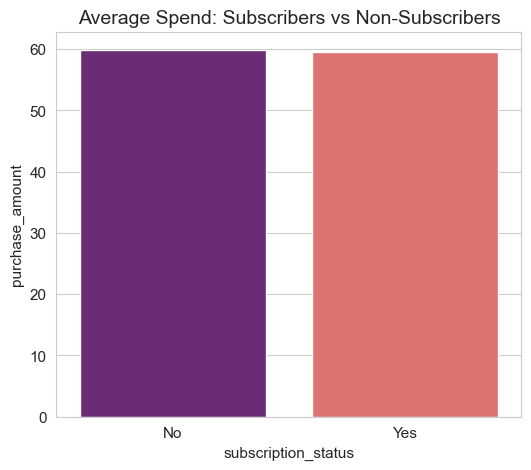

In [15]:
# Subscribers vs Non-Subscribers Spending
avg_spend = df.groupby('subscription_status')['purchase_amount'].mean().reset_index()
plt.figure(figsize=(6, 5))
sns.barplot(data=avg_spend, x='subscription_status', y='purchase_amount', palette='magma')
plt.title('Average Spend: Subscribers vs Non-Subscribers', fontsize=14)
plt.show()

C:\Users\vishe\AppData\Local\Temp\ipykernel_23732\1087228219.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='payment_method', order=df['payment_method'].value_counts().index, palette='Set2')


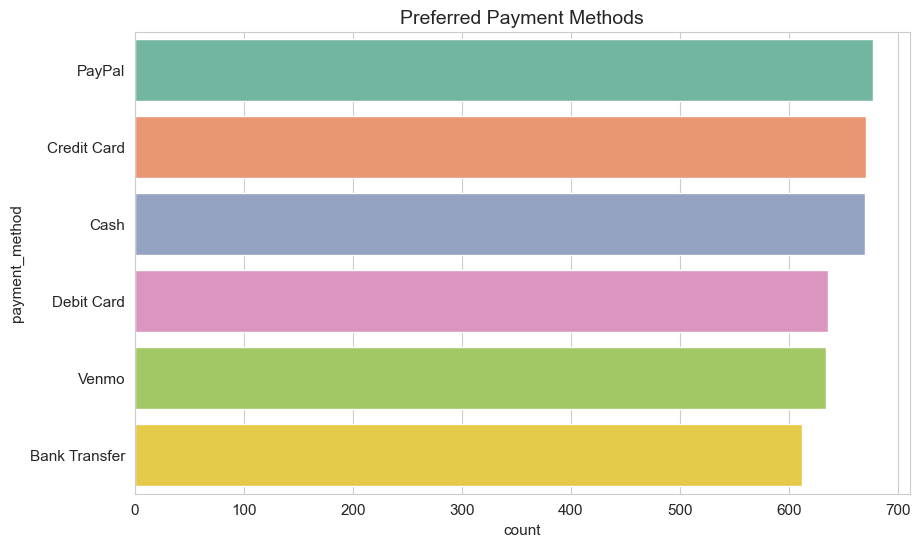

In [16]:
# Payment Methods
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='payment_method', order=df['payment_method'].value_counts().index, palette='Set2')
plt.title('Preferred Payment Methods', fontsize=14)
plt.show()

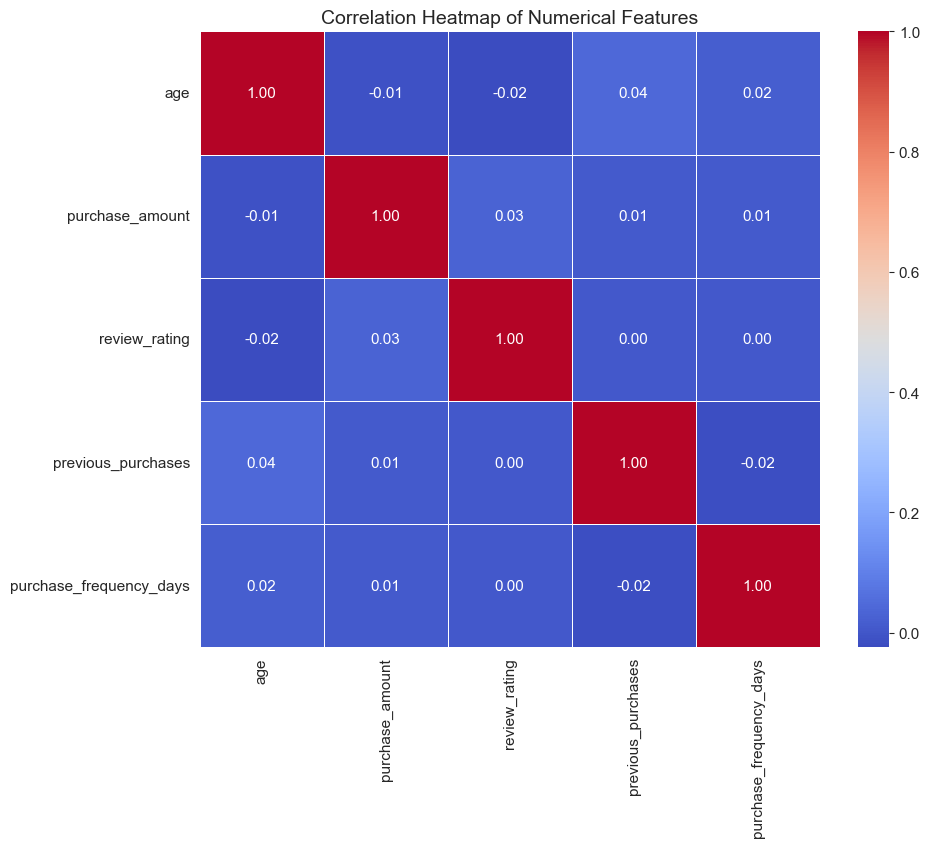

In [17]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
numeric_df = df[['age', 'purchase_amount', 'review_rating', 'previous_purchases', 'purchase_frequency_days']]
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=14)
plt.show()

**Observation:** The heatmap reveals low correlation between age and purchase amount, suggesting that purchasing power is not strictly tied to age in this dataset.